<h1 align="center">INF280 - Laboratorio de Estadística Computacional</h1>
<center>
<img src="https://activewizards.com/assets/components/phpthumbof/cache/main-image-python-site1422.5f5b0ce8fcd426270dff2a32a4bf5946.png" width="60%"></img>
<h2 align="center">LEC 1: Análisis Exploratorio de Datos</h2>

<i> Notebook creado por Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - Septiembre 2019.</i>
</center>



# Objetivo

Aprender a utilizar herramientas y técnicas básicas para el análisis exploratorio de datos, de acuerdo a patrones y regularidades existentes en diversos fenómenos aleatorios.

## Instrucciones

* Los informes deben ser desarrollados en parejas definidas al comienzo del semestre. Cualquier cambio debe ser informado previamente al ayudante para su autorización.
* El informe consiste en el desarrollo de este notebook. Completando código donde sea indicado y respondiendo las preguntas planteadas.
* Debe argumentar sus respuestas basadonse en los resultados obtenidos en sus experimentos. De no ser así, no podrán optar al puntaje máximo de la pregunta.
* Los gráficos deben ser legibles y fáciles de entender. Esto es utilizar el gráfico adecuado al problema; usar escalas correctas; incluir titulos, nombres de ejes y leyenda.
* El código debe ser legible, comente de manera adecuada y evite la modularización (_simple is better than complex - [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3)_)
* Cualquier consulta o queja debe realizarse a través de la plataforma Moodle.
* Por cada dia de atraso se descuentan 10 puntos de la nota máxima a alcanzar.
* Los trabajos que sean resultado de copia o plagio de otros trabajos, serán automáticamente evaluados con nota 0.

## Aprendizaje Esperado

Los y las estudiantes deben ser capaces de:

* Utilizar las herramientas básicas de carga, exploración y visualización básicas disponibles en los softwares estadísticos (Python o R-Project).

* Ser capaces de identificar los diferentes tipos de datos, e identificar gráficos y métodos adecuados para su estudio.

* Ser capaces de realizar un análisis comparativos entre gráficos y datos obteniendo conclusiones que se infieren de este mismo análisis.

## Actividad

Lea las siguientes preguntas y responda de manera clara y precisa. Algunas de estas requieren de completar o implementar funciones, no edite funciones si no se les indica. 

El puntaje máximo es de 100, cada pregunta indica su puntaje asignado.

### Información del Grupo





| Rol| Nombre | Correo |
| ---------- | ---------- | ---------- |
| COMPLETAR  | COMPLETAR   | COMPLETAR |
| COMPLETAR   | COMPLETAR  | COMPLETAR |


## The Complete Pokemon Dataset

<center>
<img src="https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-cover.jpg" width="100%"></img>
</center>

[The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon) es un conjunto de datos disponible en la plataforma [Kaggle](https://www.kaggle.com/). Este conjunto de datos (_dataset_) contiene información sobre _Pokemones_ disponibles hasta la séptima generación.

Esta información abarca desde los nombres, generación, tipos y stats de los diferentes _Pokemones_, la cual utilizaremos para analizar a las diferentes generaciones de pokemones.

In [0]:
# DataFrames
import pandas as pd

# Arreglos multidimensionales
import numpy as np

# Modulos para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from IPython.display import display, HTML

dataset = "https://labcomp.cl/~sborquez/datasets/pokemon/pokemon.csv"

columns = ['pokedex_number', 'name', 'type1', 'type2', 'classfication', 'generation', 'is_legendary',
           'height_m', 'weight_kg', 'capture_rate', 'base_egg_steps', 'base_happiness',
           'attack','defense', 'experience_growth', 'hp',
           'sp_attack', 'sp_defense', 'speed']

pokedata = pd.read_csv(dataset)[columns]
pokedata.type2.fillna(value='None', inplace=True)
pokedata.is_legendary = pokedata.is_legendary.astype(bool)

### Exploración inicial

Ahora que ya hemos cargado el dataset en un dataframe llamado `pokedata` revisemos cual es su contenido.

Para esto contesten las siguientes preguntas:


* (<font color='red'>5 Puntos</font>) ¿Cuántos Pokemones contiene en el datasets? Muestre los primeros 5 y últimos 5 pokemones. 

In [2]:
# COMPLETAR ...
total = len(pokedata)
print(f"Hay {total} Pokemones")

print("Primeros 5")
display(pokedata.head(5))

print("Últimos 5")
display(pokedata.tail(5))

Hay 801 Pokemones
Primeros 5


,pokedex_number,name,type1,type2,classfication,generation,is_legendary,height_m,weight_kg,capture_rate,base_egg_steps,base_happiness,attack,defense,experience_growth,hp,sp_attack,sp_defense,speed
0,1,Bulbasaur,grass,poison,Seed Pokémon,1,False,0.7,6.9,45,5120,70,49,49,1059860,45,65,65,45
1,2,Ivysaur,grass,poison,Seed Pokémon,1,False,1.0,13.0,45,5120,70,62,63,1059860,60,80,80,60
2,3,Venusaur,grass,poison,Seed Pokémon,1,False,2.0,100.0,45,5120,70,100,123,1059860,80,122,120,80
3,4,Charmander,fire,None,Lizard Pokémon,1,False,0.6,8.5,45,5120,70,52,43,1059860,39,60,50,65
4,5,Charmeleon,fire,None,Flame Pokémon,1,False,1.1,19.0,45,5120,70,64,58,1059860,58,80,65,80


Últimos 5


,pokedex_number,name,type1,type2,classfication,generation,is_legendary,height_m,weight_kg,capture_rate,base_egg_steps,base_happiness,attack,defense,experience_growth,hp,sp_attack,sp_defense,speed
796,797,Celesteela,steel,flying,Launch Pokémon,7,True,9.2,999.9,25,30720,0,101,103,1250000,97,107,101,61
797,798,Kartana,grass,steel,Drawn Sword Pokémon,7,True,0.3,0.1,255,30720,0,181,131,1250000,59,59,31,109
798,799,Guzzlord,dark,dragon,Junkivore Pokémon,7,True,5.5,888.0,15,30720,0,101,53,1250000,223,97,53,43
799,800,Necrozma,psychic,None,Prism Pokémon,7,True,2.4,230.0,3,30720,0,107,101,1250000,97,127,89,79
800,801,Magearna,steel,fairy,Artificial Pokémon,7,True,1.0,80.5,3,30720,0,95,115,1250000,80,130,115,65


* (<font color='red'>8 Puntos</font>) ¿Cuántas y cuáles son la columnas del dataset y qué tipo de dato son `(dtype)`?    Luego, por cada columna exceptuando _name_ y _pokedex_number_, indique su escala de medición (Nominal, Ordinal, Intervalos, Razón).




In [3]:
# COMPLETAR
display(pokedata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 19 columns):
pokedex_number       801 non-null int64
name                 801 non-null object
type1                801 non-null object
type2                801 non-null object
classfication        801 non-null object
generation           801 non-null int64
is_legendary         801 non-null bool
height_m             781 non-null float64
weight_kg            781 non-null float64
capture_rate         801 non-null object
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
attack               801 non-null int64
defense              801 non-null int64
experience_growth    801 non-null int64
hp                   801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
dtypes: bool(1), float64(2), int64(11), object(5)
memory usage: 113.5+ KB


None

**Escalas de Medición**


<font color="greed"> COMPLETAR </font> 
1. __type1__: ...
2. __type2__: ...
3. __classfication__: ...
4. ...


* (<font color='red'>6 Puntos</font>) Para las columnas con datos __categóricos__ (excepto _name_ y _pokedex_number_) indique los valores posibles y cuántas instancias existen por cada valor.

__Nota__: algunas columnas poseen muchos valores diferentes, no se moleste en mostrarlos todos.



In [4]:
# COMPLETAR ...

categoricos = ["type1", "type2", "generation", "classfication", "is_legendary", "capture_rate"]

for cat in categoricos:
  display(HTML(f"<h4>Columna: {cat}</h4>"))
  col = pokedata.get(cat)

  valores = col.unique()
  diferentes = col.nunique()
  
  print(f"Diferentes: {diferentes}")
  print(valores)


Diferentes: 18
['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']


Diferentes: 19
['poison' 'None' 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


Diferentes: 7
[1 2 3 4 5 6 7]


Diferentes: 588
['Seed Pokémon' 'Lizard Pokémon' 'Flame Pokémon' 'Tiny Turtle Pokémon'
 'Turtle Pokémon' 'Shellfish Pokémon' 'Worm Pokémon' 'Cocoon Pokémon'
 'Butterfly Pokémon' 'Hairy Pokémon' 'Poison Bee Pokémon'
 'Tiny Bird Pokémon' 'Bird Pokémon' 'Mouse Pokémon' 'Beak Pokémon'
 'Snake Pokémon' 'Cobra Pokémon' 'Poison Pin Pokémon' 'Drill Pokémon'
 'Fairy Pokémon' 'Fox Pokémon' 'Balloon Pokémon' 'Bat Pokémon'
 'Weed Pokémon' 'Flower Pokémon' 'Mushroom Pokémon' 'Insect Pokémon'
 'Poison Moth Pokémon' 'Mole Pokémon' 'Scratch Cat Pokémon'
 'Classy Cat Pokémon' 'Duck Pokémon' 'Pig Monkey Pokémon' 'Puppy Pokémon'
 'Legendary Pokémon' 'Tadpole Pokémon' 'Psi Pokémon' 'Superpower Pokémon'
 'Flycatcher Pokémon' 'Jellyfish Pokémon' 'Rock Pokémon' 'Megaton Pokémon'
 'Fire Horse Pokémon' 'Dopey Pokémon' 'Hermit Crab Pokémon'
 'Magnet Pokémon' 'Wild Duck Pokémon' 'Twin Bird Pokémon'
 'Triple Bird Pokémon' 'Sea Lion Pokémon' 'Sludge Pokémon'
 'Bivalve Pokémon' 'Gas Pokémon' 'Shadow Pokémon' 'Rock 

Diferentes: 2
[False  True]


Diferentes: 34
['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


In [0]:
for col in pokedata:col.value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
235                           7
50                            7
150                           7
100                           6
140                           6
127                           5
70                            4
125                           3
65                            3
55                            3
15                            2
80                            2
220                           2
170                           2
130                           2
155                           1
35                            1
145                           1
30 (Mete

* (<font color='red'>6 Puntos</font>) Para las columnas con datos __numéricos__ (excepto _pokedex_number_ y _generation_) realice una descripción de los valores (media, desviación estandar, mínimo, máximo y cuartiles)




In [5]:
# COMPLETAR ...

numericos = pokedata.select_dtypes(include=['int64','float64']).copy()
numericos = numericos.drop(['pokedex_number', 'generation'], axis=1)


numericos.describe()

,height_m,weight_kg,base_egg_steps,base_happiness,attack,defense,experience_growth,hp,sp_attack,sp_defense,speed
count,781.000000,781.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000
mean,1.163892,61.378105,7191.011236,65.362047,77.857678,73.008739,1.054996e+06,68.958801,71.305868,70.911361,66.334582
std,1.080326,109.354766,6558.220422,19.598948,32.158820,30.769159,1.602558e+05,26.576015,32.353826,27.942501,28.907662
min,0.100000,0.100000,1280.000000,0.000000,5.000000,5.000000,6.000000e+05,1.000000,10.000000,20.000000,5.000000
25%,0.600000,9.000000,5120.000000,70.000000,55.000000,50.000000,1.000000e+06,50.000000,45.000000,50.000000,45.000000
50%,1.000000,27.300000,5120.000000,70.000000,75.000000,70.000000,1.000000e+06,65.000000,65.000000,66.000000,65.000000
75%,1.500000,64.800000,6400.000000,70.000000,100.000000,90.000000,1.059860e+06,80.000000,91.000000,90.000000,85.000000
max,14.500000,999.900000,30720.000000,140.000000,185.000000,230.000000,1.640000e+06,255.000000,194.000000,230.000000,180.000000


### Visualizaciones

Una vez ya nos hemos familiarizado con la estructura de nuestros datos, podemos comenzar a hacernos preguntas y responderlas utilizando técnicas de visualización.

En la siguiente sección se pide responder las preguntas y argumentar con los gráficos correspondiente a los datos. Recuerde que los gráficos deben ser legibles y fáciles de entender. 


* (<font color='red'>12 Puntos</font>) ¿Cómo se distribuye la cantidad de Pokemones a través de las diferentes generaciones? ¿Existe alguna tendencia? ¿Cuáles son las generaciones con la mayor y la menor cantidad de Pokemones?.


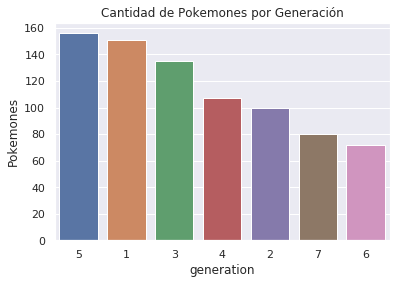

In [10]:
column = "generation"
sns.countplot(x = column,
              data = pokedata,
              # el orden es (1 punto extra) 
              order = pokedata[column].value_counts().index)

# estilo
plt.title("Cantidad de Pokemones por Generación")
plt.ylabel("Pokemones")
plt.show();

**Respuestas**

Pregunta abierta 

Máximo 5 y mínimo 6



Los Pokemones Legendarios son un grupo bastante raro y comunmente muy poderoso de Pokemones, generalmente son los protagonista de los diferentes mitos y legendas del mundo de Pokemon. Pero ¿qué tan raro son?

* <font color="red">(8 puntos) </font> ¿Cuál es la fracción de Pokemones Legendarios y No legendarios? 

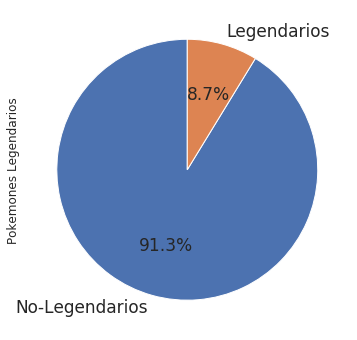

In [18]:
# Grafico
plt.figure(figsize=(6,6))
legendario = pokedata["is_legendary"].value_counts()
legendario.plot(kind="pie", autopct='%1.1f%%', startangle=90,
                labels=["No-Legendarios", "Legendarios"], fontsize=17)

# estilo
plt.ylabel("Pokemones Legendarios")
plt.show();

**Respuesta**


Solo el 8.7% son legendarios.

* <font color="red">(12 puntos) </font> ¿Cuál es la cantidad o fracción de Pokemones Legendarios y No legendarios por generación? (use solo un gráfico)

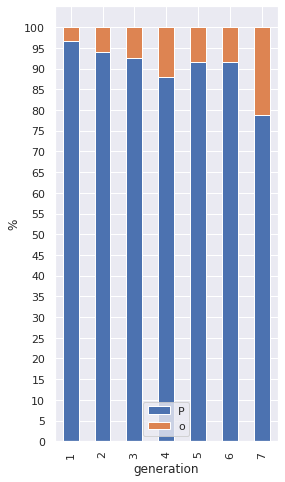

In [53]:
by_gen = pokedata.groupby("generation")
by_gen = 100*by_gen.is_legendary.value_counts(normalize=True, sort=False).unstack()

# Grafico
plt.figure(figsize=(4, 8))

by_gen.plot.bar(stacked=True, ax=plt.gca())

plt.legend("Pokemones Legendarios por Generación")
plt.yticks(np.linspace(0, 100, 1+100//5))
plt.ylabel("%")
plt.show()

**Respuesta**

<font color="greed"> COMPLETAR </font> 

Otro punto interesante para el análisis es la distribución de `types`.

* <font color="red">(8 puntos) </font> ¿Cuáles son los `type1` más frecuentes? ¿Cuáles son los  `type2` más frecuentes?


__Nota:__ Se recomienda ordenar los gráficos de mayor a menor frecuencia.

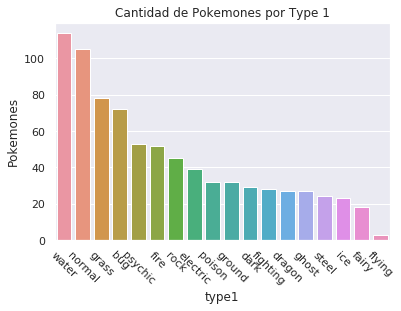

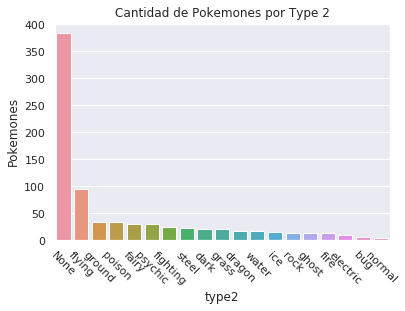

In [57]:
# COMPlETAR ...
# Grafico de type1
sns.countplot(x='type1', data=pokedata, order=pokedata['type1'].value_counts().index)
plt.xticks(rotation=-45)
plt.ylabel("Pokemones")
plt.title("Cantidad de Pokemones por Type 1")
plt.show()

# Grafico de type2
sns.countplot(x='type2', data=pokedata, order=pokedata['type2'].value_counts().index)
plt.xticks(rotation=-45)
plt.ylabel("Pokemones")
plt.title("Cantidad de Pokemones por Type 2")
plt.show();

**Respuesta**

<font color="greed"> COMPLETAR </font> 


* <font color="red">(6 puntos) </font> Vimos cuales son los tipos de Pokemones más y menos frecuentes, sería interesante también ver cuales son las combinaciones de tipos.


  Para esto se recomienda utilizar un gráfico de dos dimensiones (i.e. heatmap).

  ¿Cuáles son las 5 combinaciones más comunes?


__Nota__: NO tomar en cuenta los Pokemones sin un tipo secundario (type2 == 'None')

__Nota 2__: Quizás los métodos `.groupby([]) .size() .unstack()` le serán útiles.

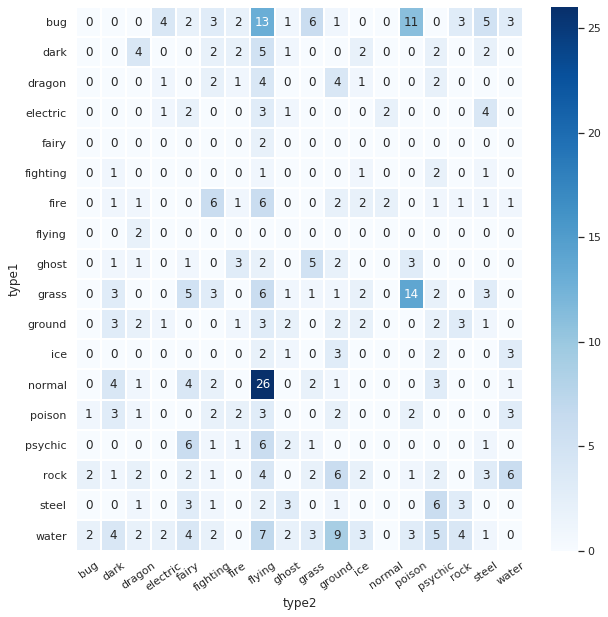

In [74]:
# COMPlETAR ...

elementales = pokedata[['type1','type2']]
elementales = elementales [elementales.type2 != 'None']
elementales = elementales.groupby(['type1','type2']).size().unstack(fill_value=0)

plt.subplots(figsize=(10, 10))
sns.heatmap(
    elementales,
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=35)
plt.show()

**Respuesta**

<font color="greed"> COMPLETAR </font> 

* <font color="red">(15 puntos) </font> Analíce el siguiente código. ¿Qué hace la función `pairplot`? ¿Qué concluisiones puede obtener del gráfico generado?



In [0]:
corcolumns = ['height_m', 'weight_kg','attack','defense', 'hp', 'speed']

sns.pairplot(pokedata, hue='is_legendary',  diag_kind="kde", vars=corcolumns)

**Respuesta**

<font color="greed"> COMPLETAR </font> 



* <font color="red">(14 puntos) </font> Finalmente, es su turno de analizar los datos y encontrar algún patrón o fenómeno. Genere __dos gráficos__ que permitan concluir alguna hipótesis sobre los datos.

  Cada gráfico debe estar acompañada con las conclusiones que se pueden obtener de este. 

  Pueden inspirarse de esta [galería](httpspython-graph-gallery.com/), intente no utilizar los gráficos vistos en las preguntas anteriores.



In [0]:
# Grafico 1


**Respuesta**

<font color="greed"> COMPLETAR </font> 

In [0]:
# Grafico 2


**Respuesta**

<font color="greed"> COMPLETAR </font> 


Felicidades! han completado el primer Laboratorio de Estadística Computacional (LEC)

Recuerden contestar todas las preguntas y llenar la tabla con la información de su grupo.